In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [2]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.dates as mdates

In [3]:
# 유니코드 깨짐현상 해결
mlp.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
mlp.rcParams["font.family"] = 'NanumGothic'

In [4]:
from data_split import *

In [5]:
ml_data = pd.read_pickle("/home/seho/Passenger_Demand/data/ml_data.pkl")

In [6]:
ml_data["month"] = ml_data["transdate"].dt.month

In [7]:
ml_data = ml_data.set_index(["mybi_stop_id", "stop_nm", "transdate"])

In [8]:
ml_data["hour"] = ml_data["hour"].astype(str)

In [9]:
# splitted_data = split(X_data = ml_data.drop(["date", "longitude", "latitude", "totalcnt", "studentcnt", "childcnt", "normalcnt"], 1),
#                       Y_data = ml_data["totalcnt"],
#                       split_ratio = [0.5, 0.3, 0.2], 
#                       seed = 1234)

In [10]:
# train_data = pd.concat([splitted_data["X_train"], splitted_data["Y_train"]], 1)

In [11]:
categorical_feature = ["dayofweek", "hour", "weekofyear", "month", "ntl_holi", "holi", "seq_holi"]

In [12]:
numerical_feature = [col for col in ml_data.columns if col not in categorical_feature + ["totalcnt"]]

In [14]:
reg_experiment = setup(ml_data, 
                       target = "totalcnt", 
                       categorical_features = categorical_feature,
                       numeric_features = numerical_feature,
                       ignore_features = ["date", "longitude", "latitude", "studentcnt", "childcnt", "normalcnt"],
                       train_size = 0.7,
                       n_jobs = 14,
#                        log_experiment = True,
#                        log_plots = True,
#                        log_profile = True,
#                        log_data = True,
#                        profile = True,
                       experiment_name="Passenger_Demand")

,Description,Value
0,session_id,5903
1,Target,totalcnt
2,Original Data,"(620940, 175)"
3,Missing Values,True
4,Numeric Features,161
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(434657, 230)"


In [18]:
%%time
lightgbm = create_model('lightgbm')

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:14:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE


PicklingError: Could not pickle the task to send it to the workers.

In [16]:
%%time
tuned_lightgbm_tune_sklearn_hyperopt = tune_model(lightgbm, optimize = "RMSE", search_library = "tune-sklearn", search_algorithm = "hyperopt", fold = 5, return_tuner = True, n_iter = 20)

NameError: name 'lightgbm' is not defined

In [17]:
%%time
tuned_lightgbm_optuna_tpe = tune_model(lightgbm, optimize = "RMSE", search_library = "optuna", search_algorithm = "tpe", fold = 5, return_tuner = True, , n_iter = 20)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
%%time
tuned_lightgbm_optuna_random = tune_model(lightgbm, optimize = "RMSE", search_library = "optuna", search_algorithm = "random", fold = 5, return_tuner = True, n_iter = 20)

In [ ]:
%%time
tuned_lightgbm_scikit_optimize = tune_model(lightgbm, optimize = "RMSE", search_library = "scikit-optimize", search_algorithm = "bayesian", fold = 5, return_tuner = True, n_iter = 20)

In [ ]:
%%time
tuned_lightgbm_scikit_learn_grid = tune_model(lightgbm, optimize = "RMSE", search_library = "scikit-learn", search_algorithm = "grid", fold = 5, return_tuner = True, n_iter = 20)

In [ ]:
%%time
base_model = compare_models(fold=5)

In [ ]:
ridge = create_model('ridge')

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
%%time
rf = create_model('rf')
tuned_rf = tune_model(rf)

In [ ]:
%%time
tuned_ridge = tune_model('ridge')

In [18]:
bese_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.4002,7.2157,2.6862,0.7961,0.4663,0.5689,2.7200
rf,Random Forest Regressor,1.3986,7.6230,2.7610,0.7846,0.4646,0.5881,135.1600
gbr,Gradient Boosting Regressor,1.4745,7.8843,2.8078,0.7772,0.4875,0.5940,35.0780
et,Extra Trees Regressor,1.4354,7.9922,2.8270,0.7742,0.4774,0.6162,223.0600
lr,Linear Regression,1.5858,8.2695,2.8756,0.7663,0.5335,0.6081,2.3560
ridge,Ridge Regression,1.5858,8.2695,2.8756,0.7663,0.5335,0.6081,0.6500
br,Bayesian Ridge,1.5833,8.2696,2.8757,0.7663,0.5324,0.6071,10.5100
omp,Orthogonal Matching Pursuit,1.5842,8.2803,2.8775,0.7660,0.5329,0.6062,0.6580
en,Elastic Net,1.5570,8.5096,2.9171,0.7595,0.5181,0.5898,0.6500
lasso,Lasso Regression,1.5741,8.5387,2.9221,0.7587,0.5237,0.5849,0.7500


In [30]:
lgbm = create_model(
    estimator='lightgbm',
    fold=5
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3867,7.0949,2.6636,0.7982,0.4643,0.5730
1,1.3999,7.2198,2.6870,0.7915,0.4655,0.5694
2,1.4010,7.2198,2.6870,0.7950,0.4661,0.5630
3,1.4106,7.3009,2.7020,0.7946,0.4666,0.5712
4,1.4029,7.2431,2.6913,0.8012,0.4690,0.5678
Mean,1.4002,7.2157,2.6862,0.7961,0.4663,0.5689
SD,0.0077,0.0673,0.0125,0.0033,0.0016,0.0034


In [31]:
passenger_prediction =  predict_model(lgbm, data=train_data)

,dayofweek,month,hour,totalcnt_bf1d,totalcnt_bf1w,temperature,humidity,precipitation,snowfall,pm_alert_cnt,...,school_category_0,school_category_1,school_category_2,school_category_3,school_category_4,school_category_5,event_nearby,festival_nearby,totalcnt,Label
620346,수,4,18,12.0,15.0,11.5,25.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,15.0,12.865664
279555,수,5,3,0.0,0.0,13.8,56.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.021578
645997,금,8,13,1.0,6.0,28.7,74.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,3.132348
333625,목,9,1,0.0,0.0,21.8,88.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.063066
711157,화,4,13,9.0,NaN,21.0,16.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,11.0,6.559430


In [39]:
importance_df = pd.DataFrame({"feature_name" : lgbm.feature_name_, "importance" : lgbm.feature_importances_})

In [54]:
!sudo apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 39s (248 kB/s)                                             
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package fonts-nanum.
(Reading database ... 66637 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking fonts-nanum (20180306-3) ...
7Progress: [ 40%] [##############

In [62]:
importance_df.sort_values("importance", ascending = False).head(20).to_csv("lgbm_feature_importance.csv", encoding = "euc-kr")

<AxesSubplot:xlabel='feature_name'>

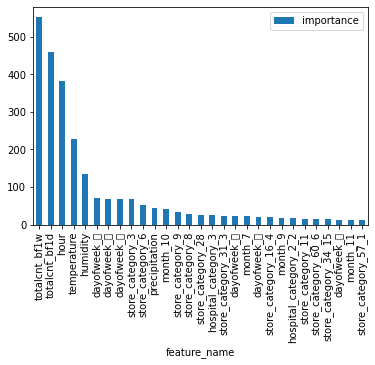

In [59]:
importance_df.loc[importance_df["importance"] > 10].sort_values("importance", ascending = False).plot.bar(x = "feature_name")

In [33]:
passenger_prediction.head(20)

,dayofweek,month,hour,totalcnt_bf1d,totalcnt_bf1w,temperature,humidity,precipitation,snowfall,pm_alert_cnt,...,school_category_0,school_category_1,school_category_2,school_category_3,school_category_4,school_category_5,event_nearby,festival_nearby,totalcnt,Label
620346,수,4,18,12.0,15.0,11.5,25.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,15.0,12.865664
279555,수,5,3,0.0,0.0,13.8,56.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.021578
645997,금,8,13,1.0,6.0,28.7,74.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,3.132348
333625,목,9,1,0.0,0.0,21.8,88.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.063066
711157,화,4,13,9.0,NaN,21.0,16.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,11.0,6.559430
29586,월,5,18,0.0,4.0,22.1,61.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,2.0,3.729559
599449,목,7,1,0.0,0.0,20.6,98.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.133912
528404,금,11,20,0.0,0.0,16.3,72.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0.0,0.084563
205646,목,5,14,0.0,0.0,24.9,28.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.201218
408368,화,10,8,8.0,8.0,14.3,71.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,8.0,7.685927


In [ ]:
passenger_prediction.head()

In [ ]:
bese_model.

In [21]:
bese_model.predict(X = splitted_data["X_train"])

ValueError: Number of features of the model must match the input. Model n_features_ is 501 and input n_features is 114 

In [2]:
%%time
mybicard = pd.read_parquet('/home/seho/Passenger_Demand/data/mybicard.parquet', engine='pyarrow')

CPU times: user 50.3 s, sys: 32.3 s, total: 1min 22s
Wall time: 34.5 s


In [ ]:
ml_data = pd.read_parquet("/home/seho/Passenger_Demand/data")

In [ ]:
reg_experiment = setup(housing_data, 
                       target = 'median_house_value', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')